In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from ivydb_google_drive_reader import IvyDBGoogleDriveReader

In [69]:
import ipywidgets as widgets

file_name='cache/joined_199601.csv'
df = pd.read_csv(file_name)
df["Expiration"]=pd.to_datetime(df["Expiration"])
df["Date"]=pd.to_datetime(df["Date"])
df["Date"]=df["Date"].dt.date
df["Expiration"]=df["Expiration"].dt.date

security_ids = df['Security ID'].unique()
print(security_ids)
reader = IvyDBGoogleDriveReader(
    credentials_file='testproject1-419520-61c1efd44a96.json',
    folder_id='1AlYGA105eq8xdJQzJsSNWFBmIZvvEcsu',
    definitions_file='ivydb_table_definitions.json'
)

try:
    df_sec = reader.read_file('IVYSECURD.zip', 'Security')
    df_sec.to_csv('cache/security.csv')
except Exception as e:
    print(e)
    df_sec = pd.read_csv('cache/security.csv')

df_sec=df_sec[df_sec['Security ID'].isin(security_ids)]
#df_sec['Security ID'] = df_sec['Security ID'].astype(int)
#df_sec = df_sec.set_index('Security ID')
"""
def compute_ticker():
    sec_list=df_sec['Security ID'].unique()
    date_list=df[df['Security ID']==sec_list[0]]['Date'].unique()
    expiry_list=df[(df['Security ID']==sec_list[0]) & (df['Date']==date_list[0])]["Expiration"].unique()
    return(sec_list,date_list,expiry_list)

(sec_list,date_list,expiry_list)=compute_ticker()

# Create a dropdown widget for security ID/ticker selection
security_selector = widgets.Dropdown(
    options=sec_list,
    description='Security ID/Ticker:',
    value=sec_list[0],
)
date_selector = widgets.Dropdown(
    options=date_list,
    description='Date:',
    value=date_list[0],
)
expiry_selector = widgets.Dropdown(
    options=expiry_list,
    description='Expiry:',
    value=expiry_list[0],
)
# Create a text widget to display the ticker
ticker_display = widgets.Text(description='Ticker:', value=df_sec.loc[df_sec.index[0], 'Ticker'])

def recompute_ticker(security_id):
    date_list=df[df['Security ID']==security_id]['Date'].unique()
    expiry_list=df[(df['Security ID']==security_id) & (df['Date']==date_list[0])]["Expiration"].unique()
    return(date_list,expiry_list)
    
def recompute_date(date):
    expiry_list=df[(df['Security ID']==security_selector.value) & (df['Date']==date)]["Expiration"].unique()
    return(expiry_list)

# Define a function to update the ticker display
def update_ticker(change):
    #ticker_display.value = df_sec.loc[change.new, 'Ticker']
    ticker_display.value=df_sec[df_sec['Security ID']==change.new]['Ticker'].iloc[0]
    (date_list,expiry_list)= recompute_ticker(change.new)
    date_selector.options=date_list
    date_selector.value=date_list[0]
    expiry_selector.options=expiry_list
    expiry_selector.value=expiry_list[0]

def update_date(change):
    #ticker_display.value = df_sec.loc[change.new, 'Ticker']
    expiry_list=recompute_date(change.new)
    expiry_selector.options=expiry_list
    expiry_selector.value=expiry_list[0]

# Observe the changes in the security_selector widget and update the ticker display
security_selector.observe(update_ticker, names='value')
date_selector.observe(update_date, names='value')

# Display the dropdown widget and the ticker display
widgets.VBox([security_selector, ticker_display, date_selector,expiry_selector])
"""


/var/folders/c1/dv7w7b2x49j3spqsxnz6y_sw0000gn/T/ipykernel_94192/1674353527.py:4: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


[    nan   5005.   5015. ... 113717. 113737. 123617.]
file_info: {'id': '1Xmslzc-YYpc6qBbMkW84GUQAi9kZNAnS', 'name': 'IVYSECURD.zip', 'modifiedTime': '2024-08-30T17:38:49.968Z'}


'\ndef compute_ticker():\n    sec_list=df_sec[\'Security ID\'].unique()\n    date_list=df[df[\'Security ID\']==sec_list[0]][\'Date\'].unique()\n    expiry_list=df[(df[\'Security ID\']==sec_list[0]) & (df[\'Date\']==date_list[0])]["Expiration"].unique()\n    return(sec_list,date_list,expiry_list)\n\n(sec_list,date_list,expiry_list)=compute_ticker()\n\n# Create a dropdown widget for security ID/ticker selection\nsecurity_selector = widgets.Dropdown(\n    options=sec_list,\n    description=\'Security ID/Ticker:\',\n    value=sec_list[0],\n)\ndate_selector = widgets.Dropdown(\n    options=date_list,\n    description=\'Date:\',\n    value=date_list[0],\n)\nexpiry_selector = widgets.Dropdown(\n    options=expiry_list,\n    description=\'Expiry:\',\n    value=expiry_list[0],\n)\n# Create a text widget to display the ticker\nticker_display = widgets.Text(description=\'Ticker:\', value=df_sec.loc[df_sec.index[0], \'Ticker\'])\n\ndef recompute_ticker(security_id):\n    date_list=df[df[\'Security

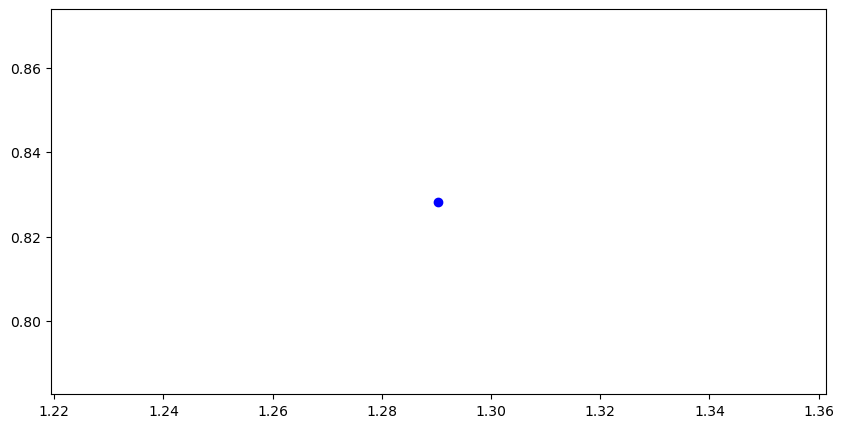

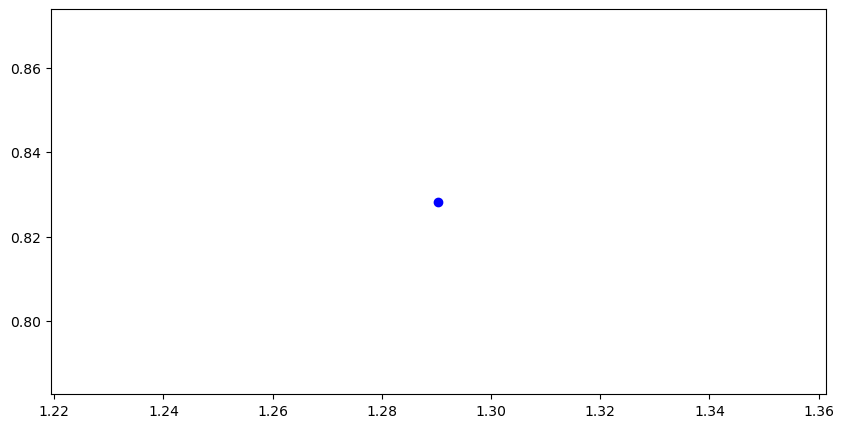

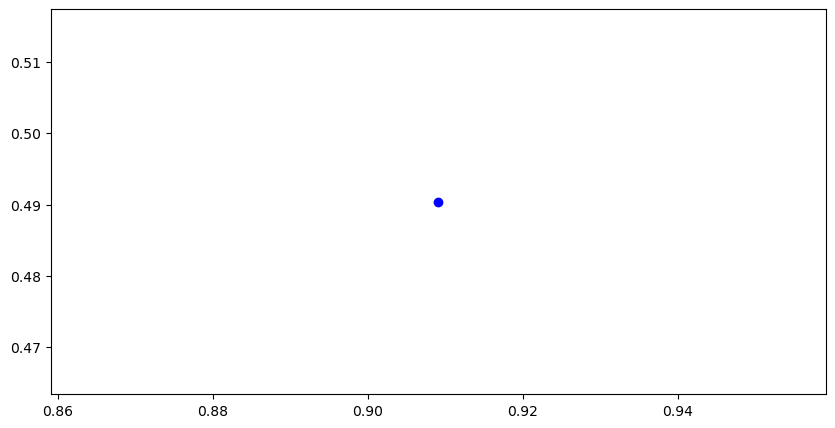

In [70]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import functools

# Assume df and df_sec are your dataframes

@functools.lru_cache(maxsize=None)
def get_dates_for_security(security_id):
    return sorted(df[df['Security ID'] == security_id]['Date'].unique())

@functools.lru_cache(maxsize=None)
def get_expiries_for_security_date(security_id, date):
    return sorted(df[(df['Security ID'] == security_id) & (df['Date'] == date)]["Expiration"].unique())

def get_ticker(security_id):
    return df_sec[df_sec['Security ID'] == security_id]['Ticker'].iloc[0]

security_ids = sorted(df_sec['Security ID'].unique())

security_selector = widgets.Dropdown(
    options=security_ids,
    description='Security ID:',
    style={'description_width': 'initial'}
)

date_selector = widgets.Dropdown(
    description='Date:',
    style={'description_width': 'initial'}
)

expiry_selector = widgets.Dropdown(
    description='Expiry:',
    style={'description_width': 'initial'}
)

ticker_display = widgets.HTML(
    description='Ticker:',
    style={'description_width': 'initial'}
)

output = widgets.Output()

def update_date_options(change):
    security_id = change.new
    date_selector.options = get_dates_for_security(security_id)
    ticker_display.value = f"<b>{get_ticker(security_id)}</b>"

def update_expiry_options(change):
    expiry_selector.options = get_expiries_for_security_date(security_selector.value, change.new)

# Modified update functions to handle direct value inputs
def update_date_options(security_id):
    date_selector.options = get_dates_for_security(security_id)
    ticker_display.value = f"<b>{get_ticker(security_id)}</b>"
    if date_selector.options:
        date_selector.value = date_selector.options[0]
        update_expiry_options(date_selector.value)

def update_expiry_options(date):
    expiry_selector.options = get_expiries_for_security_date(security_selector.value, date)
    if expiry_selector.options:
        expiry_selector.value = expiry_selector.options[0]

# Modify the observe functions
security_selector.observe(lambda change: update_date_options(change.new), names='value')
date_selector.observe(lambda change: update_expiry_options(change.new), names='value')

@output.capture()
def plot_data(security_id, date, expiry):
    plt.figure(figsize=(10, 5))
    df_plot=df[(df["Security ID"]==security_selector.value)&(df["Date"]==date_selector.value)&(df["Expiration"]==expiry_selector.value)]

    #df_plot["Delta Weighted IVol"].plot()

    plt.plot(df_plot["Percent_ATM"],df_plot["Delta Weighted IVol"],'bo',label='Delta Weighted IVol')
    plt.plot(df_plot["Percent_ATM"],df_plot["Implied Volatility"],'ro',label='Call IVol')
    plt.plot(df_plot["Percent_ATM"],df_plot["Implied Volatility.1"],'go',label='Put IVol')
    plt.legend()
    slope= df_plot[df_plot["Slope"] != 0]["Slope"].mean()
    atm_vol = df_plot[df_plot["ATM IV"] != 0]["ATM IV"].mean()
    #print(f'atm_vol={atm_vol},slope={slope},slope_arr={df_plot["ATM IV"].values}')
    expiry_date=pd.to_datetime(expiry_selector.value)
    date_date=pd.to_datetime(date_selector.value)
    texp=(expiry_date-date_date).days/365
    #df_plot["texp"]=texp
    #print(texp)
    #compute_vol=atm_vol+slope*df_plot["Percent_ATM"]
    compute_vol=df_plot.apply(lambda x: atm_vol+slope*10/np.sqrt(texp)*np.log(x["Percent_ATM"]),axis=1)
    plt.plot(df_plot["Percent_ATM"],compute_vol,'y-')
    # Your plotting code here
    plt.title(f"Data for {get_ticker(security_id)} on {date} (Expiry: {expiry})")
    plt.show()

def on_change(change):
    security_id = security_selector.value
    date = date_selector.value
    expiry = expiry_selector.value
    output.clear_output()
    plot_data(security_id, date, expiry)

security_selector.observe(on_change, names='value')
date_selector.observe(on_change, names='value')
expiry_selector.observe(on_change, names='value')

# Initial setup
if security_ids:
    security_selector.value = security_ids[0]
    update_date_options(security_ids[0])
    if date_selector.options:
        update_expiry_options(date_selector.value)
        on_change(None)

display(widgets.VBox([
    widgets.HBox([security_selector, ticker_display]),
    widgets.HBox([date_selector, expiry_selector]),
    output
]))

<Axes: >

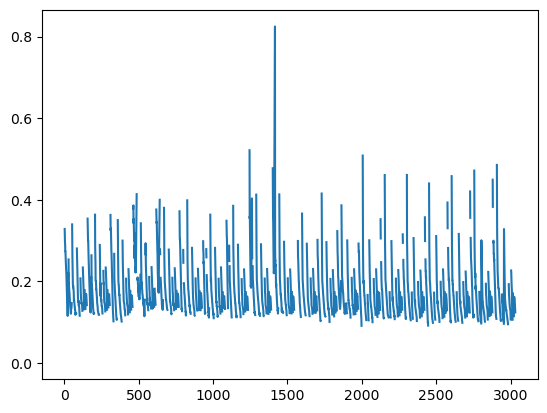

In [30]:

#df_plot=df[(df["Security ID"]==security_selector.value)&(df["Date"]==date_selector.value)&(df["Expiration"]==expiry_selector.value)]
df_plot
df
file_name='cache/joined_199601.csv'
df = pd.read_csv(file_name)
df["Implied Volatility.1"].plot()

In [72]:
df_sec[df_sec["Ticker"]=='XOM']

,Security ID,CUSIP,Ticker,SIC,Index Flag,Exchange Flags,Class,Issue Type,Industry Group
8950,104533,30231G10,XOM,2911,0,1,NaN,0,120
